# Correlations

In [1]:
import os,sys
import numpy as np
import pandas as pd
import pylab as plt
from scipy import stats
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

src_dir = os.path.abspath(os.pardir)
sys.path[0] = src_dir

from analysis.CodingScoring import scoreTIPI, normTIPI
# plt.style.use('dark_background')

src_dir

'/Users/melissawessel/Documents/dev/python/personality-stratification'

In [3]:

questions = pd.read_csv('../data/External/dataHeadings.csv')
dataRaw = pd.read_csv('../data/External/dataRaw.csv', names=questions.QuestionCode)
dataRaw.head()


,Start Date,End Date,DressColor,DressColorOther,DressShadow,DressShadowOther,DressLight,DressTrueColors,DressTrueColorsOther,JacketColor,...,C+,S-,O+,E-,A+,C-,S+,O-,HonestyCheck,FreeText
0,10/14/17 0:50,10/14/17 0:59,White/Gold,NaN,Yes,NaN,Artificial light,No,NaN,Other (please specify),...,Neither agree nor disagree,Agree slightly,Agree strongly,Agree slightly,Agree strongly,Agree moderately,Agree slightly,Disagree moderately,Yes,Best of luck!
1,10/14/17 0:30,10/14/17 0:40,NaN,Switches from blue/black to blue/gold,No,NaN,Artificial light,No,NaN,Other (please specify),...,Agree strongly,Agree slightly,Agree slightly,Disagree slightly,Agree moderately,Disagree strongly,Agree moderately,Disagree strongly,Yes,Hope research is going well!! Good luck!
2,10/14/17 0:00,10/14/17 0:04,Blue/Black,NaN,No,NaN,Artificial light,No,NaN,Blue and white,...,Agree slightly,Agree slightly,Agree moderately,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Yes,NaN
3,10/13/17 23:38,10/13/17 23:45,White/Gold,NaN,Yes,NaN,Natural light,No,NaN,Green and gold,...,Agree moderately,Disagree moderately,Agree moderately,Disagree slightly,Disagree slightly,Disagree moderately,Agree moderately,Neither agree nor disagree,Yes,I'm an engineer and would love to see the data...
4,10/13/17 23:24,10/13/17 23:30,White/Gold,NaN,No,NaN,Natural light,No,NaN,Other (please specify),...,Agree slightly,Agree slightly,Neither agree nor disagree,Agree slightly,Agree moderately,Neither agree nor disagree,Agree slightly,Agree slightly,Yes,NaN


In [4]:
df = dataRaw.join(normTIPI(scoreTIPI(dataRaw)))
df.head()

,Start Date,End Date,DressColor,DressColorOther,DressShadow,DressShadowOther,DressLight,DressTrueColors,DressTrueColorsOther,JacketColor,...,C-,S+,O-,HonestyCheck,FreeText,O,C,E,A,S
0,10/14/17 0:50,10/14/17 0:59,White/Gold,NaN,Yes,NaN,Artificial light,No,NaN,Other (please specify),...,Agree moderately,Agree slightly,Disagree moderately,Yes,Best of luck!,0.871115,-1.163156,0.347041,-0.578990,-0.242004
1,10/14/17 0:30,10/14/17 0:40,NaN,Switches from blue/black to blue/gold,No,NaN,Artificial light,No,NaN,Other (please specify),...,Disagree strongly,Agree moderately,Disagree strongly,Yes,Hope research is going well!! Good luck!,0.432133,1.664499,0.662877,-0.578990,0.096085
2,10/14/17 0:00,10/14/17 0:04,Blue/Black,NaN,No,NaN,Artificial light,No,NaN,Blue and white,...,Agree slightly,Agree slightly,Agree slightly,Yes,NaN,-0.884811,-0.456242,0.031205,-0.986787,-0.242004
3,10/13/17 23:38,10/13/17 23:45,White/Gold,NaN,Yes,NaN,Natural light,No,NaN,Green and gold,...,Disagree moderately,Agree moderately,Neither agree nor disagree,Yes,I'm an engineer and would love to see the data...,-0.445830,0.957585,0.031205,-1.802382,1.110352
4,10/13/17 23:24,10/13/17 23:30,White/Gold,NaN,No,NaN,Natural light,No,NaN,Other (please specify),...,Neither agree nor disagree,Agree slightly,Agree slightly,Yes,NaN,-1.762774,-0.102785,-0.916303,0.644401,-0.242004


## Chronotype

In [5]:
cxOCEAS = df[['Chronotype','O','C','E','A','S']]
cxOCEAS.head()

,Chronotype,O,C,E,A,S
0,Strong owl,0.871115,-1.163156,0.347041,-0.578990,-0.242004
1,Strong owl,0.432133,1.664499,0.662877,-0.578990,0.096085
2,Owl,-0.884811,-0.456242,0.031205,-0.986787,-0.242004
3,Lark,-0.445830,0.957585,0.031205,-1.802382,1.110352
4,Lark,-1.762774,-0.102785,-0.916303,0.644401,-0.242004


In [11]:
m = cxOCEAS.groupby(['Chronotype']).mean()

In [12]:
m

,O,C,E,A,S
Chronotype,,,,,
Lark,-0.250813,0.451232,-0.198122,0.164111,0.188074
Owl,-0.222538,0.151161,-0.231596,0.072580,0.099233
Strong lark,-0.239012,0.596748,-0.232154,0.164584,0.223488
Strong owl,-0.062307,-0.081510,-0.247742,-0.020602,-0.042507


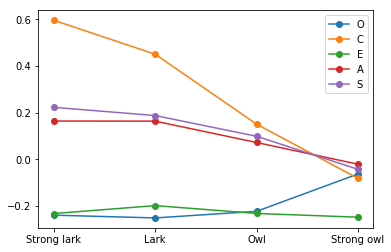

In [13]:
plt.plot(m.loc[['Strong lark','Lark','Owl','Strong owl']], marker='o')
plt.legend(['O','C','E','A','S'])

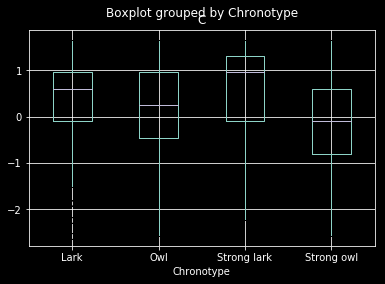

In [23]:
cxOCEAS.boxplot('C', by='Chronotype')

In [14]:
cxOCEAS['C'][cxOCEAS['Chronotype']=='Strong lark'].dropna().head()

91     0.957585
142    1.664499
150    1.664499
186    0.604128
189    1.664499
Name: C, dtype: float64

In [25]:
for trait in ['S','E','O','A','C']:
    sl = cxOCEAS[trait][cxOCEAS['Chronotype']=='Strong lark'].dropna()
    l = cxOCEAS[trait][cxOCEAS['Chronotype']=='Lark'].dropna()
    o = cxOCEAS[trait][cxOCEAS['Chronotype']=='Owl'].dropna()
    so = cxOCEAS[trait][cxOCEAS['Chronotype']=='Strong owl'].dropna()
    f_val, p_val = stats.f_oneway(sl,l,o,so)
    print('F=%f, p=%f'%(f_val,p_val))

F=42.857438, p=0.000000
F=1.638169, p=0.178211
F=30.401000, p=0.000000
F=26.590246, p=0.000000
F=300.886551, p=0.000000


In [95]:
dataRaw.columns

Index(['Start Date', 'End Date', 'DressColor', 'DressColorOther',
       'DressShadow', 'DressShadowOther', 'DressLight', 'DressTrueColors',
       'DressTrueColorsOther', 'JacketColor', 'JacketColorOther',
       'JacketShadow', 'JacketLight', 'JacketLightDirection',
       'JacketTrueColors', 'FlopColor', 'FlopColorOther', 'FlopShadow',
       'FlopLight', 'FlopTrueColors', 'Age', 'Gender', 'Ethnicity',
       'Chronotype', 'ChronotypeOther', 'FavColor', 'VisDisorder', 'E+', 'A-',
       'C+', 'S-', 'O+', 'E-', 'A+', 'C-', 'S+', 'O-', 'HonestyCheck',
       'FreeText'],
      dtype='object')

## Code OCEAS
By standard deviation

In [14]:
cxOCEAS.head()

,Chronotype,O,C,E,A,S
0,Strong owl,0.871115,-1.163156,0.347041,-0.578990,-0.242004
1,Strong owl,0.432133,1.664499,0.662877,-0.578990,0.096085
2,Owl,-0.884811,-0.456242,0.031205,-0.986787,-0.242004
3,Lark,-0.445830,0.957585,0.031205,-1.802382,1.110352
4,Lark,-1.762774,-0.102785,-0.916303,0.644401,-0.242004


In [25]:
cxOCEAS[['E','A','C','S','O']].describe()

,E,A,C,S,O
count,16495.000000,16430.000000,16437.000000,16463.000000,16481.000000
mean,-0.223053,0.083562,0.220115,0.101507,-0.186079
std,1.062520,0.998884,0.963992,1.015286,0.981983
min,-1.863812,-3.025773,-2.576983,-2.270539,-3.957682
25%,-1.232139,-0.578990,-0.456242,-0.580093,-0.884811
50%,-0.284631,0.236604,0.250672,0.096085,-0.006848
75%,0.662877,1.052198,0.957585,1.110352,0.432133
max,1.926221,1.867792,1.664499,1.786531,1.310097


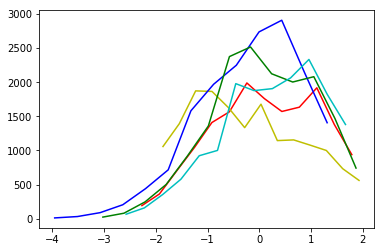

In [19]:
i=0
colors = ['r','y','b','g','c']
for trait in ['S','E','O','A','C']:
    plt.plot(cxOCEAS[trait].value_counts().sort_index(),color=colors[i])
    i+=1

In [6]:
# df = pd.DataFrame(np.load('TIPI_scored_normed_OCEAN.npy'), columns=['O','C','E','A','N'])
# cxOCEAS[['O','C','E','A','S']] = normTIPI(cxOCEAS)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [6]:
cxOCEAS['N'] = 0-cxOCEAS['S']
df = cxOCEAS.drop(columns=['S'])
df.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Chronotype,O,C,E,A,N
0,Strong owl,0.871115,-1.163156,0.347041,-0.578990,0.242004
1,Strong owl,0.432133,1.664499,0.662877,-0.578990,-0.096085
2,Owl,-0.884811,-0.456242,0.031205,-0.986787,0.242004
3,Lark,-0.445830,0.957585,0.031205,-1.802382,-1.110352
4,Lark,-1.762774,-0.102785,-0.916303,0.644401,0.242004


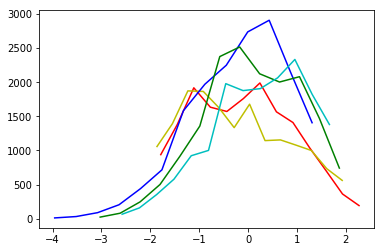

In [7]:
i=0
colors = ['r','y','b','g','c']
for trait in ['N','E','O','A','C']:
    plt.plot(cxOCEAS[trait].value_counts().sort_index(),color=colors[i])
    i+=1

## Tri-strat

Code traits into low mid high based on standard deviation

In [8]:
# df = df.drop(columns=['N_strat','E_strat','O_strat','A_strat','C_strat'])
df = cxOCEAS[['Chronotype','N','E','O','A','C']].dropna()
for trait in ['N','E','O','A','C']:
    df['%s_strat'%trait]=0
    df['%s_strat'%trait].loc[df[trait]<-1] = 1
    df['%s_strat'%trait].loc[df[trait]>1] = 3
    df['%s_strat'%trait].loc[df['%s_strat'%trait]==0] = 2
df.head()

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Chronotype,N,E,O,A,C,N_strat,E_strat,O_strat,A_strat,C_strat
0,Strong owl,0.242004,0.347041,0.871115,-0.578990,-1.163156,2,2,2,2,1
1,Strong owl,-0.096085,0.662877,0.432133,-0.578990,1.664499,2,2,2,2,3
2,Owl,0.242004,0.031205,-0.884811,-0.986787,-0.456242,2,2,2,2,2
3,Lark,-1.110352,0.031205,-0.445830,-1.802382,0.957585,1,2,2,1,2
4,Lark,0.242004,-0.916303,-1.762774,0.644401,-0.102785,2,2,1,2,2


In [11]:
df.corr()

,N,E,O,A,C,N_strat,E_strat,O_strat,A_strat,C_strat
N,1.000000,-0.068567,-0.094157,-0.215933,-0.242282,0.885808,-0.064977,-0.078786,-0.181750,-0.202522
E,-0.068567,1.000000,0.238554,0.062527,-0.001975,-0.062431,0.875673,0.203556,0.066519,-0.000645
O,-0.094157,0.238554,1.000000,0.146760,-0.044882,-0.090622,0.216013,0.822186,0.131071,-0.035100
A,-0.215933,0.062527,0.146760,1.000000,0.086278,-0.192680,0.053502,0.110258,0.882235,0.074907
C,-0.242282,-0.001975,-0.044882,0.086278,1.000000,-0.220731,-0.004438,-0.035469,0.078886,0.849008
N_strat,0.885808,-0.062431,-0.090622,-0.192680,-0.220731,1.000000,-0.056964,-0.071080,-0.159943,-0.190296
E_strat,-0.064977,0.875673,0.216013,0.053502,-0.004438,-0.056964,1.000000,0.186813,0.055133,-0.000556
O_strat,-0.078786,0.203556,0.822186,0.110258,-0.035469,-0.071080,0.186813,1.000000,0.098376,-0.026431
A_strat,-0.181750,0.066519,0.131071,0.882235,0.078886,-0.159943,0.055133,0.098376,1.000000,0.066702
C_strat,-0.202522,-0.000645,-0.035100,0.074907,0.849008,-0.190296,-0.000556,-0.026431,0.066702,1.000000


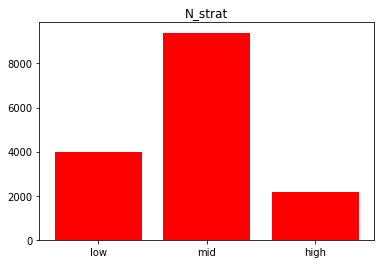

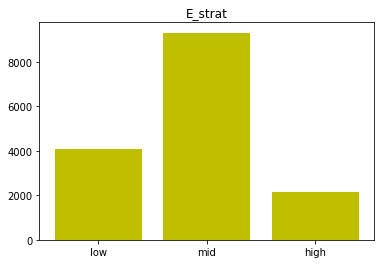

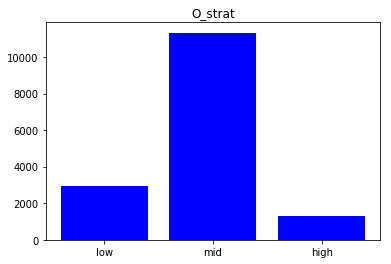

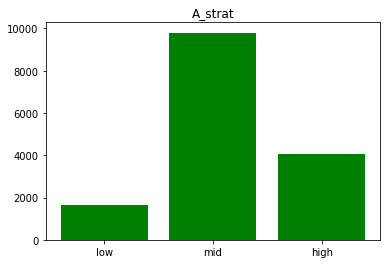

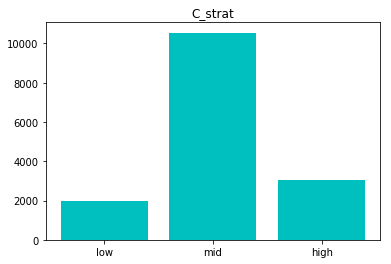

In [23]:
i=0
colors = ['r','y','b','g','c']
for trait in ['N_strat','E_strat','O_strat','A_strat','C_strat']:
    plt.figure(i)
    plt.title(trait)
    plt.bar(x=['low','mid','high'],height=df[trait].value_counts().sort_index(),color=colors[i])
    i+=1

## Bisect

Bisect traits along the mean a la MBTI

In [13]:
# df = df.drop(columns=['N_bistrat','E_bistrat','O_bistrat','A_bistrat','C_bistrat'])
for trait in ['N','E','O','A','C']:
    df['%s_bistrat'%trait]=0
    df['%s_bistrat'%trait].loc[df[trait]<0] = 1
    df['%s_bistrat'%trait].loc[df[trait]>0] = 3
df.head()

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Chronotype,N,E,O,A,C,N_strat,E_strat,O_strat,A_strat,C_strat,N_bistrat,E_bistrat,O_bistrat,A_bistrat,C_bistrat
0,Strong owl,0.242004,0.347041,0.871115,-0.578990,-1.163156,2,2,2,2,1,3,3,3,1,1
1,Strong owl,-0.096085,0.662877,0.432133,-0.578990,1.664499,2,2,2,2,3,1,3,3,1,3
2,Owl,0.242004,0.031205,-0.884811,-0.986787,-0.456242,2,2,2,2,2,3,3,1,1,1
3,Lark,-1.110352,0.031205,-0.445830,-1.802382,0.957585,1,2,2,1,2,1,3,1,1,3
4,Lark,0.242004,-0.916303,-1.762774,0.644401,-0.102785,2,2,1,2,2,3,1,1,3,1


In [32]:
df.loc[df['N_bistrat']==0]

,Chronotype,N,E,O,A,C,N_strat,E_strat,O_strat,A_strat,C_strat,N_bistrat,E_bistrat,O_bistrat,A_bistrat,C_bistrat


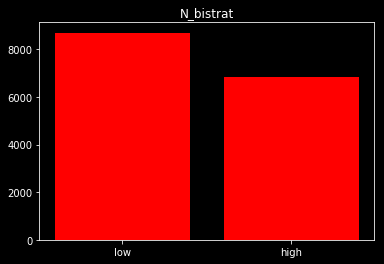

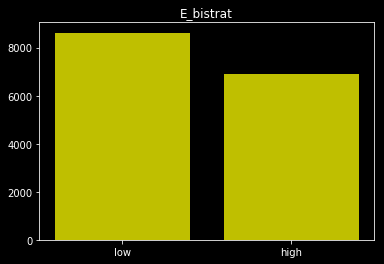

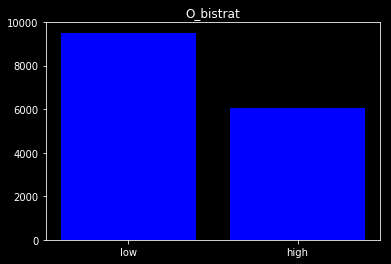

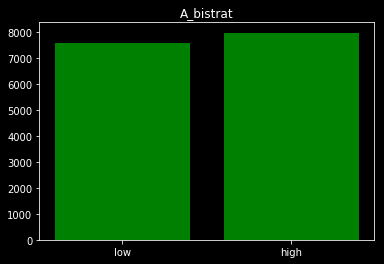

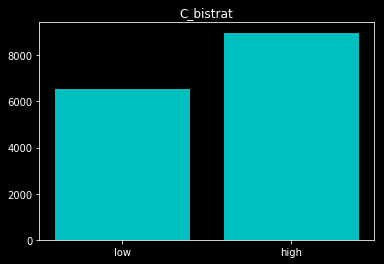

In [33]:
i=0
colors = ['r','y','b','g','c']
for trait in ['N_bistrat','E_bistrat','O_bistrat','A_bistrat','C_bistrat']:
    plt.figure(i)
    plt.title(trait)
    plt.bar(x=['low','high'],height=df[trait].value_counts().sort_index(),color=colors[i])
    i+=1

In [34]:
df.tail()

,Chronotype,N,E,O,A,C,N_strat,E_strat,O_strat,A_strat,C_strat,N_bistrat,E_bistrat,O_bistrat,A_bistrat,C_bistrat
16696,Owl,-0.434174,1.294549,0.432133,-0.171193,-0.809699,2,3,2,2,2,1,3,3,1,1
16697,Lark,-0.772263,0.347041,-0.884811,1.052198,0.250672,2,2,2,3,2,1,3,1,3,3
16698,Owl,-1.110352,-1.863812,-0.006848,0.644401,1.664499,1,1,2,2,3,1,1,1,3,3
16699,Owl,2.270539,-0.916303,-0.445830,-0.171193,-0.456242,3,2,2,2,2,3,1,1,1,1
16700,Lark,1.256272,0.031205,-0.884811,-2.210179,-0.456242,3,2,2,1,2,3,3,1,1,1


## Chi square tests on stratified data

In [11]:
pd.crosstab(index=df['E_strat'],columns=df['Chronotype'])

Chronotype,Lark,Owl,Strong lark,Strong owl
E_strat,,,,
1,1090,1564,341,1077
2,2767,3768,725,2044
3,596,800,202,565


In [12]:
x = pd.crosstab(index=df['E_strat'],columns=df['Chronotype'])
x.values

array([[1090, 1564,  341, 1077],
       [2767, 3768,  725, 2044],
       [ 596,  800,  202,  565]])

In [13]:
stats.chi2_contingency(x.values)

(52.35467929534106,
 1.5823309446953225e-09,
 6,
 array([[1166.91009717, 1606.89259283,  332.27981209,  965.91749791],
        [2666.24055602, 3671.54437222,  759.21693803, 2206.99813373],
        [ 619.8493468 ,  853.56303494,  176.50324989,  513.08436836]]))

In [38]:
x = pd.crosstab(index=df['C_bistrat'],columns=df['Chronotype'])
stats.chi2_contingency(x.values)

(568.0008088295247,
 8.711012477230626e-123,
 3,
 array([[1878.46161272, 2586.73402407,  534.89542442, 1554.9089388 ],
        [2574.53838728, 3545.26597593,  733.10457558, 2131.0910612 ]]))

In [8]:
for trait in ['S','E','O','A','C']:
    x = pd.crosstab(index=df['%s_strat'%trait],columns=df['Chronotype'])
    chi2, p, dof, expected = stats.chi2_contingency(x.values)
    print('Chi2=%f, p=%f, dof=%f'%(chi2,p,dof))

Chi2=139.858501, p=0.000000, dof=6.000000
Chi2=52.354679, p=0.000000, dof=6.000000
Chi2=72.095988, p=0.000000, dof=6.000000
Chi2=83.631618, p=0.000000, dof=6.000000
Chi2=705.254558, p=0.000000, dof=6.000000


## Regressions

In [14]:
df = df.replace(['Strong owl','Owl','Lark','Strong lark'],[1,2,3,4])

In [15]:
df.head()

,Chronotype,N,E,O,A,C,N_strat,E_strat,O_strat,A_strat,C_strat,N_bistrat,E_bistrat,O_bistrat,A_bistrat,C_bistrat
0,1,0.242004,0.347041,0.871115,-0.578990,-1.163156,2,2,2,2,1,3,3,3,1,1
1,1,-0.096085,0.662877,0.432133,-0.578990,1.664499,2,2,2,2,3,1,3,3,1,3
2,2,0.242004,0.031205,-0.884811,-0.986787,-0.456242,2,2,2,2,2,3,3,1,1,1
3,3,-1.110352,0.031205,-0.445830,-1.802382,0.957585,1,2,2,1,2,1,3,1,1,3
4,3,0.242004,-0.916303,-1.762774,0.644401,-0.102785,2,2,1,2,2,3,1,1,3,1


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


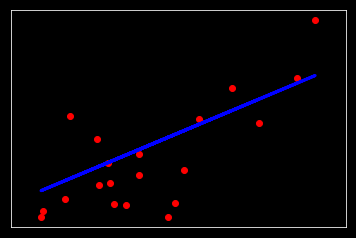

In [56]:
# built in diabetes dataset example regression
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='r')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [16]:
testN = 500
consc_X_test = df['C'].values.reshape(-1,1)[-1*testN:]
consc_X_train = df['C'].values.reshape(-1,1)[:-1*testN]

In [17]:
chron_Y_test = df['Chronotype'].values.reshape(-1,1)[-1*testN:]
chron_Y_train = df['Chronotype'].values.reshape(-1,1)[:-1*testN]

In [18]:
reg = linear_model.LinearRegression()

In [19]:
reg.fit(consc_X_train,chron_Y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
chron_Y_pred = reg.predict(consc_X_test)

Coefficients: 
 [[0.21642077]]
Mean squared error: 0.861
Root mean squared error: 0.928
Variance score: 0.024
0.05444478342545999


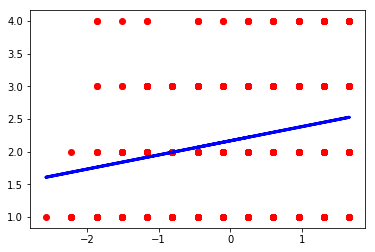

In [22]:
print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(chron_Y_test, chron_Y_pred))
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(chron_Y_test, chron_Y_pred)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(chron_Y_test, chron_Y_pred))

print(reg.score(consc_X_train,chron_Y_train))

# Plot outputs
plt.scatter(consc_X_test, chron_Y_test,  color='r')
plt.plot(consc_X_test, chron_Y_pred, color='blue', linewidth=3)

### Tri-strat

In [69]:
consc_X_test = df['C_strat'].values.reshape(-1,1)[-1*testN:]
consc_X_train = df['C_strat'].values.reshape(-1,1)[:-1*testN]

In [70]:
reg.fit(consc_X_train,chron_Y_train)
chron_Y_pred = reg.predict(consc_X_test)

Coefficients: 
 [[0.32221062]]
Mean squared error: 0.868
Root mean squared error: 0.932
Variance score: 0.016


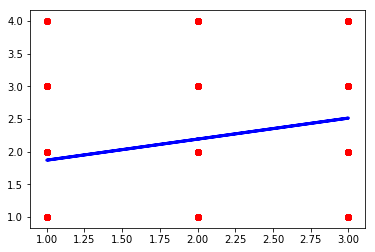

In [71]:
print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(chron_Y_test, chron_Y_pred))
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(chron_Y_test, chron_Y_pred)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(chron_Y_test, chron_Y_pred))

# Plot outputs
plt.scatter(consc_X_test, chron_Y_test,  color='r')
plt.plot(consc_X_test, chron_Y_pred, color='blue', linewidth=3)

### Bi-strat

In [72]:
consc_X_test = df['C_bistrat'].values.reshape(-1,1)[-1*testN:]
consc_X_train = df['C_bistrat'].values.reshape(-1,1)[:-1*testN]

In [73]:
reg.fit(consc_X_train,chron_Y_train)
chron_Y_pred = reg.predict(consc_X_test)

Coefficients: 
 [[0.17201378]]
Mean squared error: 0.872
Root mean squared error: 0.934
Variance score: 0.011


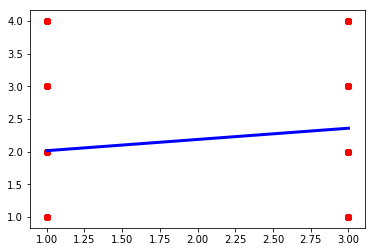

In [74]:
print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(chron_Y_test, chron_Y_pred))
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(chron_Y_test, chron_Y_pred)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(chron_Y_test, chron_Y_pred))

# Plot outputs
plt.scatter(consc_X_test, chron_Y_test,  color='r')
plt.plot(consc_X_test, chron_Y_pred, color='blue', linewidth=3)

### Multi

In [75]:
df[['C','O']].values

array([[-1.16315566,  0.87111501],
       [ 1.6644988 ,  0.43213345],
       [-0.45624205, -0.88481124],
       ...,
       [ 1.6644988 , -0.00684811],
       [-0.45624205, -0.44582968],
       [-0.45624205, -0.88481124]])

In [76]:
consc_X_test = df[['O','C','E','A','N']].values[-1*testN:]
consc_X_train = df[['O','C','E','A','N']].values[:-1*testN]

In [77]:
reg.fit(consc_X_train,chron_Y_train)
chron_Y_pred = reg.predict(consc_X_test)

Coefficients: 
 [[-0.06035191  0.2032633   0.01993571  0.0483894  -0.02385572]]
Mean squared error: 0.848
Root mean squared error: 0.921
Variance score: 0.038


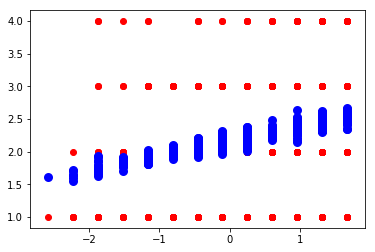

In [78]:
print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(chron_Y_test, chron_Y_pred))
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(chron_Y_test, chron_Y_pred)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(chron_Y_test, chron_Y_pred))

# Plot outputs
plt.scatter(consc_X_test[:,1], chron_Y_test,  color='r')
plt.scatter(consc_X_test[:,1], chron_Y_pred, color='blue', linewidth=3)

In [79]:
consc_X_test = df[['O_strat','C_strat','E_strat','A_strat','N_strat']].values[-1*testN:]
consc_X_train = df[['O_strat','C_strat','E_strat','A_strat','N_strat']].values[:-1*testN]

In [55]:
consc_X_test = df[['O_bistrat','C_bistrat','E_bistrat','A_bistrat','N_bistrat']].values[-1*testN:]
consc_X_train = df[['O_bistrat','C_bistrat','E_bistrat','A_bistrat','N_bistrat']].values[:-1*testN]

In [80]:
reg.fit(consc_X_train,chron_Y_train)
chron_Y_pred = reg.predict(consc_X_test)

Coefficients: 
 [[-0.10254318  0.30550076  0.03428403  0.0665272  -0.04610837]]
Mean squared error: 0.854
Root mean squared error: 0.924
Variance score: 0.032


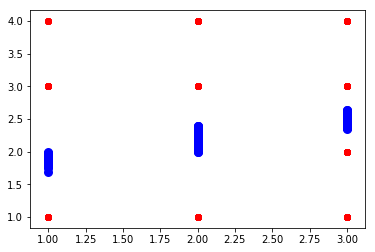

In [81]:
print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(chron_Y_test, chron_Y_pred))
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(chron_Y_test, chron_Y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(chron_Y_test, chron_Y_pred))

# Plot outputs
plt.scatter(consc_X_test[:,1], chron_Y_test,  color='r')
plt.scatter(consc_X_test[:,1], chron_Y_pred, color='blue', linewidth=3)

In [128]:
.032/.038
# tri strat method accounts for 84% of the variance that a continuous OCEAN model does

0.8421052631578948

In [58]:
.026/.038

0.6842105263157895

## Logistic

In [129]:
reg_l = linear_model.LogisticRegression()

In [138]:
consc_X_test = df['C'].values.reshape(-1,1)[-1*testN:]
consc_X_train = df['C'].values.reshape(-1,1)[:-1*testN]

In [131]:
consc_X_test = df[['O','C','E','A','N']].values[-1*testN:]
consc_X_train = df[['O','C','E','A','N']].values[:-1*testN]

In [132]:
chron_Y_test = df['Chronotype'].values.reshape(-1,1)[-1*testN:]
chron_Y_train = df['Chronotype'].values.reshape(-1,1)[:-1*testN]

In [146]:
reg_l.fit(consc_X_train,chron_Y_train)
chron_Y_pred = reg.predict(consc_X_test)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: shapes (500,1) and (5,1) not aligned: 1 (dim 1) != 5 (dim 0)

Coefficients: 
 [938.23786125]
Mean squared error: 1.113
Variance score: -0.261


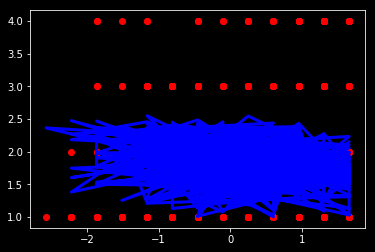

In [142]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.3f" % mean_squared_error(chron_Y_test, chron_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(chron_Y_test, chron_Y_pred))

# Plot outputs
plt.scatter(consc_X_test, chron_Y_test,  color='r')
plt.plot(consc_X_test, chron_Y_pred, color='blue', linewidth=3)

In [144]:
df['C'].values.reshape(-1,1)

array([[-1.16315566],
       [ 1.6644988 ],
       [-0.45624205],
       ...,
       [ 1.6644988 ],
       [-0.45624205],
       [-0.45624205]])